EDA:

In [2]:
import pandas as pd

In [3]:
cab_data = pd.read_csv('Cab_Data.csv')
city_data = pd.read_csv('City.csv')
customer_data = pd.read_csv('Customer_ID.csv')
transaction_data = pd.read_csv('Transaction_ID.csv')

Recommendation and hypothesis results:

In [7]:
len(cab_data)

359392

In [23]:
cab_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [13]:
cab_data.drop_duplicates(subset=['Date of Travel', 'Company', 'City', 'KM Travelled', 'Price Charged', 'Cost of Trip'])

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.6320
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.6020
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.7760
...,...,...,...,...,...,...,...
359387,10440101,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600
359388,10440104,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480
359389,10440105,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500
359390,10440106,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480


In [3]:
len(city_data)

20

In [6]:
city_data.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [10]:
city_data.drop_duplicates()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"
5,ORANGE COUNTY,"1,030,185","12,994"
6,SAN DIEGO CA,"959,307","69,995"
7,PHOENIX AZ,"943,999","6,133"
8,DALLAS TX,"942,908","22,157"
9,ATLANTA GA,"814,885","24,701"


In [51]:
r = 0
for ind, row in city_data.iterrows():
    print("city:", row['City'])
    print(float(row['Population'])/(float(row['Users'])))

city: NEW YORK NY


ValueError: could not convert string to float: ' 8,405,837 '

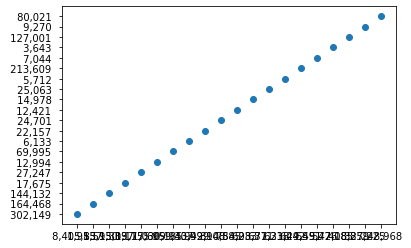

In [52]:
# city scatter plot
plt.scatter(city_data['Population'], city_data['Users'])
plt.show()

In [4]:
len(customer_data)

49171

In [7]:
customer_data.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [14]:
customer_data = customer_data.drop_duplicates(subset=['Gender', 'Age', 'Income (USD/Month)'])

In [15]:
len(customer_data)

48554

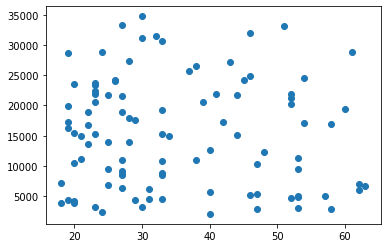

In [39]:
# scatter plot 1
plt.scatter(customer_data['Age'][1:100], customer_data['Income (USD/Month)'][1:100])
plt.show()

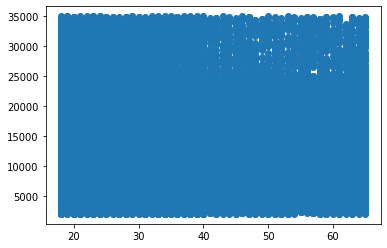

In [38]:
# scatter plot 2
plt.scatter(customer_data['Age'], customer_data['Income (USD/Month)'])
plt.show()

In [5]:
len(transaction_data)

440098

In [21]:
transaction_data = transaction_data.drop_duplicates()#subset=['Customer ID', 'Payment_Mode'])

In [22]:
len(transaction_data)

440098

In [5]:
#from learntools.time_series.utils import plot_periodogram, seasonal_plot
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

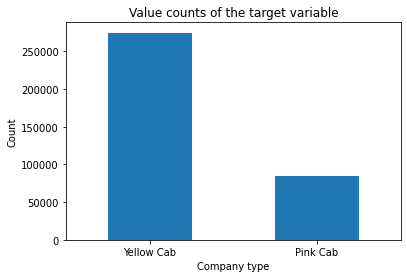

In [12]:
cab_data["Company"].value_counts().plot(kind="bar")
plt.title("Value counts of the target variable")
plt.xlabel("Company type")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.show()

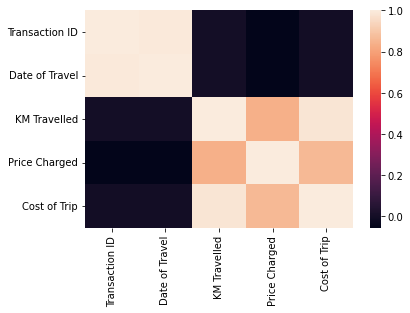

In [14]:

corrmat = cab_data.corr()
hm = sns.heatmap(corrmat)
plt.show()

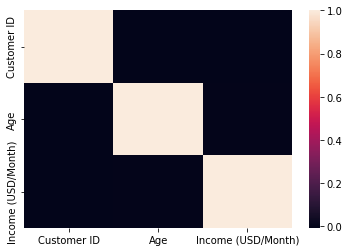

In [15]:
corrmat = customer_data.corr()
hm = sns.heatmap(corrmat)
plt.show()

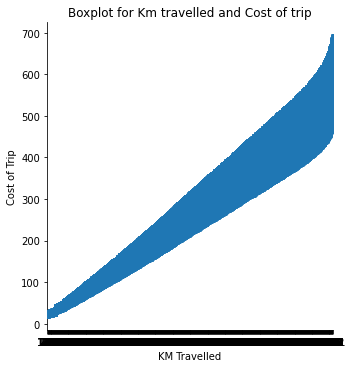

In [16]:
# boxplot 1
sns.catplot(x="KM Travelled", y="Cost of Trip", data=cab_data)
plt.title("Boxplot for Km travelled and Cost of trip")
plt.show()

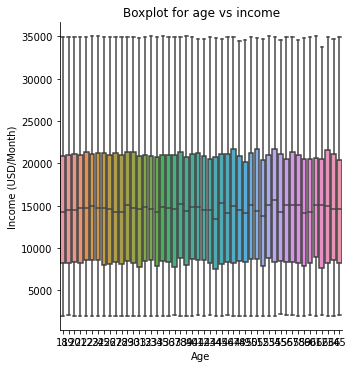

In [22]:
# boxplot 2
sns.catplot(x="Age", y="Income (USD/Month)", data=customer_data, kind="box")
plt.title("Boxplot for age vs income")
plt.show()

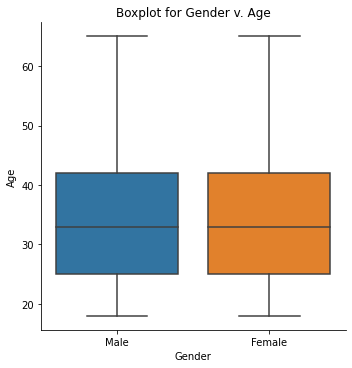

In [21]:
# boxplot 3
sns.catplot(x="Gender", y="Age", data=customer_data, kind="box")
plt.title("Boxplot for Gender v. Age")
plt.show()

Findings: (5-7 hypotheses) 
 


1. From the boxplot above "boxplot 3" about customer data, we find that there is a similar mean and quartiles of age based on whether the customer is male or female. 



2. Which company has maximum cab users at a particular time period?

For the whole time period, it is found that Yellow Cab has had 274681 users and therefore is the company with the max cab users. 


3. Does age proportionally increase with income in customer data?
 
 From "scatter plot 1" and "scatter plot 2" above, there is not a (linear) trend between age and income. 

4. From the boxplot above "boxplot 1" there is a linear trend between KM travelled and Cost of trip, and also the standard deviation becomes larger as KM travelled increases.

5. From the boxplot above "boxplot 2" the mean income is the same no matter the age of the customer. Also, the standard deviation remains similar as well. 


6. What trend in city data is for Population:Users?

From "city scatter plot", there is a positive linear trend relating population and users

In [24]:
# time period for cab company

dmax = max(cab_data['Date of Travel'])
dmin = min(cab_data['Date of Travel'])

In [25]:
dmax

43465

In [26]:
dmin

42371

In [31]:
cab1 = cab_data.groupby('Company').agg({'Date of Travel': ['max', 'min']})

In [32]:
cab1

Date of Travel       
                      max    min
Company                         
Pink Cab            43465  42371
Yellow Cab          43465  42371

In [33]:
cab2 = cab_data.groupby('Company').agg(['min', 'max'])

In [34]:
cab2

Transaction ID           Date of Travel               City  \
                      min       max            min    max         min   
Company                                                                 
Pink Cab         10000011  10437615          42371  43465  ATLANTA GA   
Yellow Cab       10000384  10440107          42371  43465  ATLANTA GA   

                          KM Travelled       Price Charged           \
                      max          min   max           min      max   
Company                                                               
Pink Cab    WASHINGTON DC          1.9  48.0         15.60  1623.48   
Yellow Cab  WASHINGTON DC          1.9  48.0         20.73  2048.03   

           Cost of Trip         
                    min    max  
Company                         
Pink Cab           19.0  576.0  
Yellow Cab         22.8  691.2

In [35]:
cab_data['Company'].value_counts()

Yellow Cab    274681
Pink Cab       84711
Name: Company, dtype: int64